In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


%matplotlib inline

In [2]:
# Define column names
columns = [
    "mpg", "cylinders", "displacement", "horsepower", 
    "weight", "acceleration", "model_year", "origin", "car_name"
]

In [3]:
# load the data
data = pd.read_csv('auto-mpg.data', sep='\s+', names=columns, na_values='?')

In [4]:
## Save the data into a CSV file
data.to_csv('data.csv')

In [5]:
## Display the data head
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
## Display the data tail
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [7]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [8]:
# Statistical summary
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
## Check the missing values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

### Handling Missing Values

In [10]:
## handling "horsepower"
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())

In [11]:
## Check the missing values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

### Exploratory Data Analysis

In [12]:
## Drop non-numeric columns such as 'car_name'
numeric_data = data.drop(columns=['car_name'])

In [13]:
numeric_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


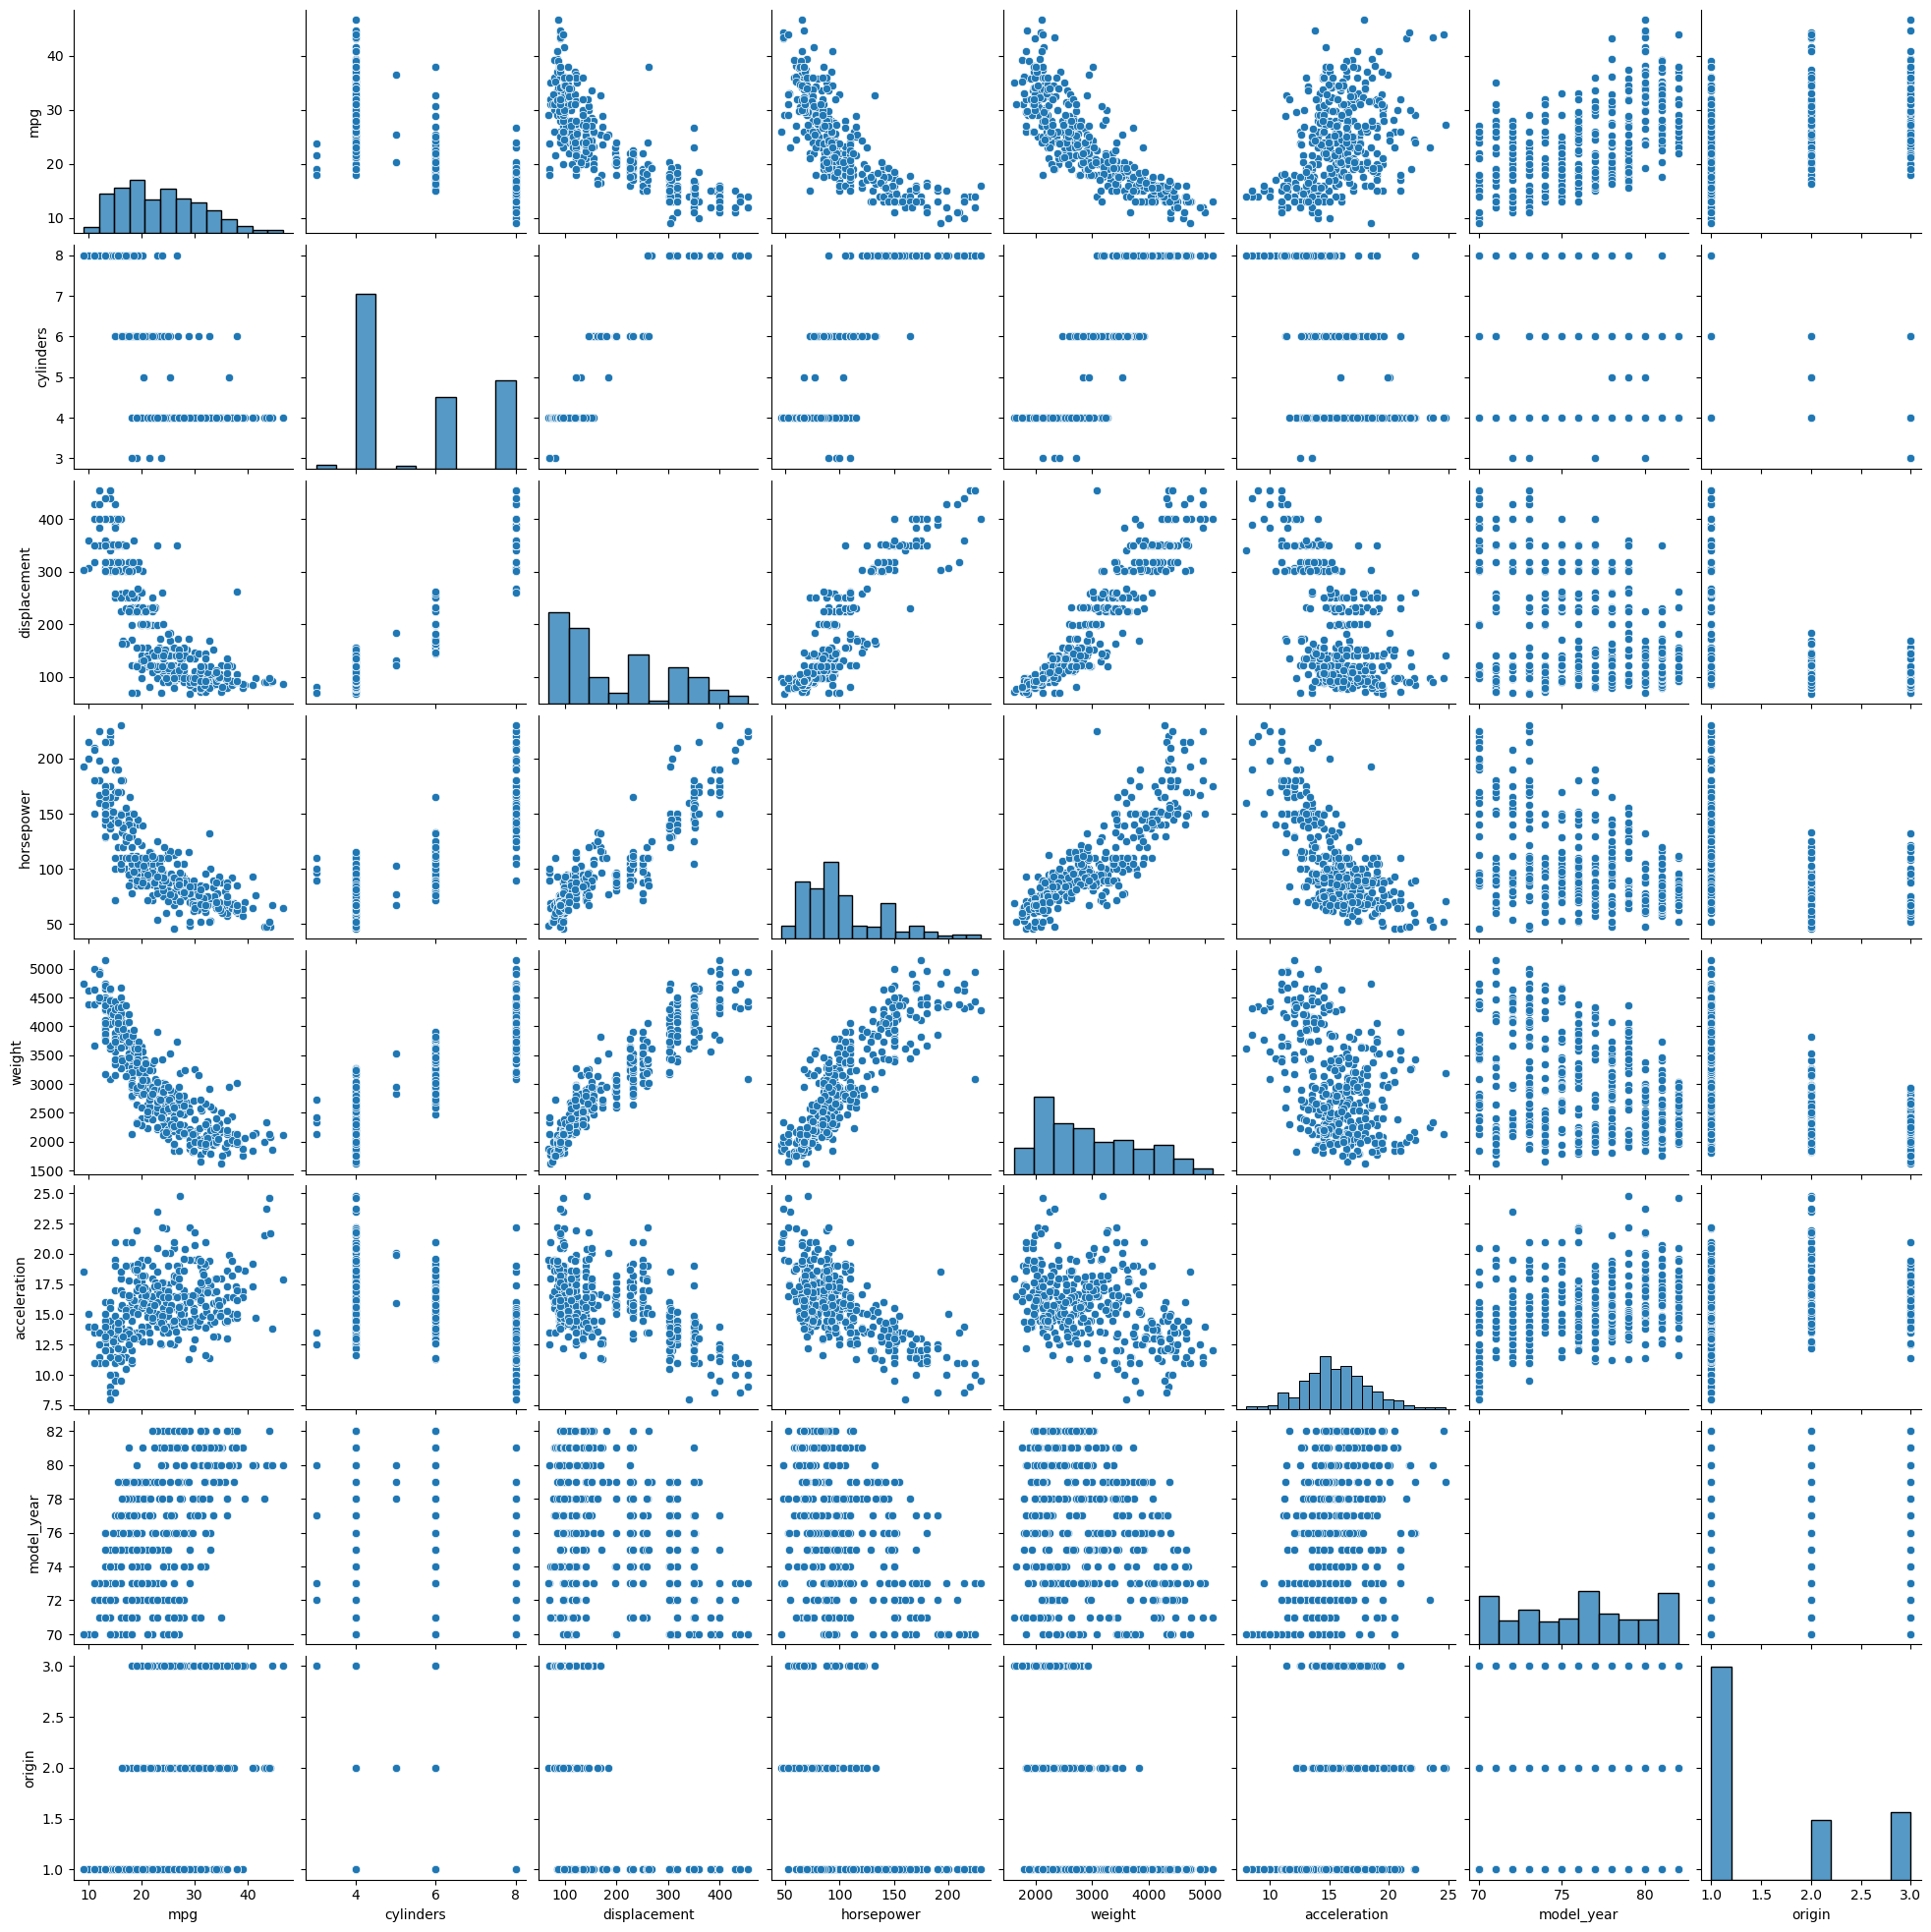

In [14]:
sns.pairplot(numeric_data)

<Axes: >

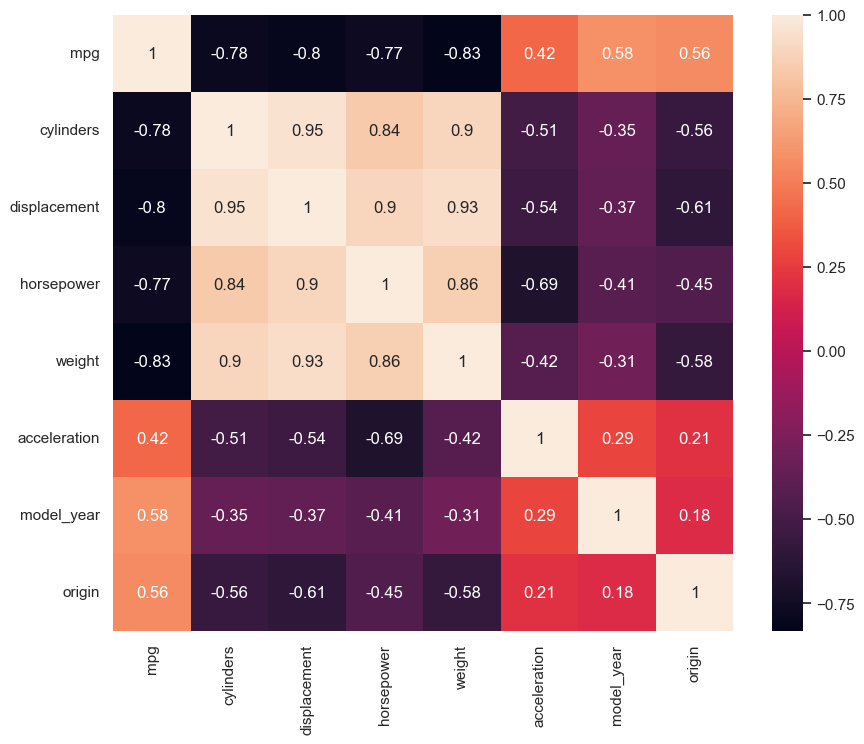

In [15]:
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(numeric_data.corr(), annot=True)

In [17]:
## Target Variable (y):
## y = MPG (Mileage Per Galon) or fuel efficiency
y = numeric_data['mpg']

In [18]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [19]:
## Features variable (X)
## Inputs used to predict "y"

X = numeric_data[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'model_year', 'origin']]

In [20]:
X

,displacement,horsepower,weight,acceleration,cylinders,model_year,origin
0,307.0,130.0,3504.0,12.0,8,70,1
1,350.0,165.0,3693.0,11.5,8,70,1
2,318.0,150.0,3436.0,11.0,8,70,1
3,304.0,150.0,3433.0,12.0,8,70,1
4,302.0,140.0,3449.0,10.5,8,70,1
...,...,...,...,...,...,...,...
393,140.0,86.0,2790.0,15.6,4,82,1
394,97.0,52.0,2130.0,24.6,4,82,2
395,135.0,84.0,2295.0,11.6,4,82,1
396,120.0,79.0,2625.0,18.6,4,82,1


### Visualize the datapoints more closly


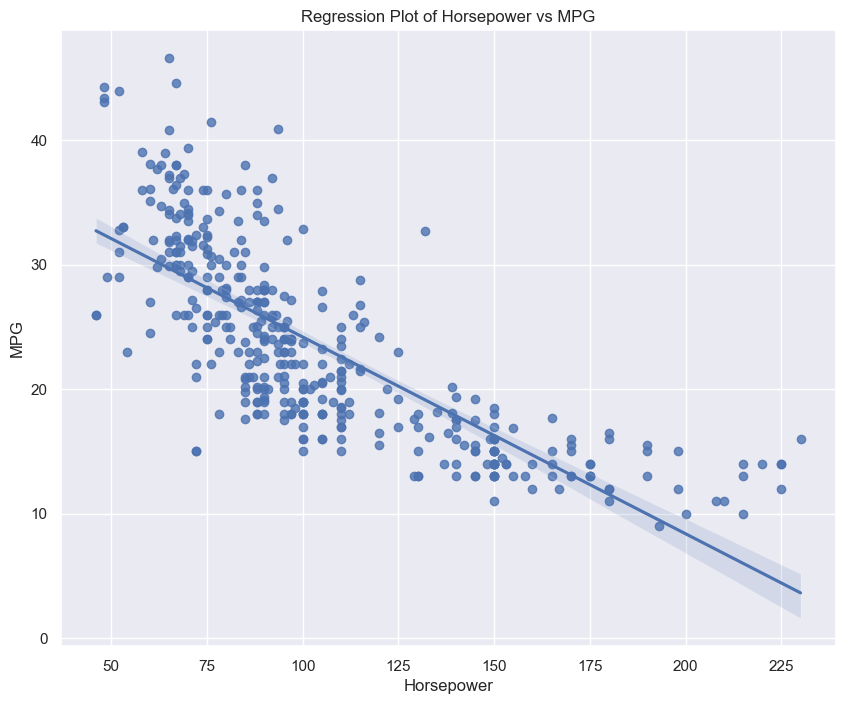

In [21]:
sns.regplot(x=numeric_data['horsepower'], y=numeric_data['mpg'])
plt.title('Regression Plot of Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

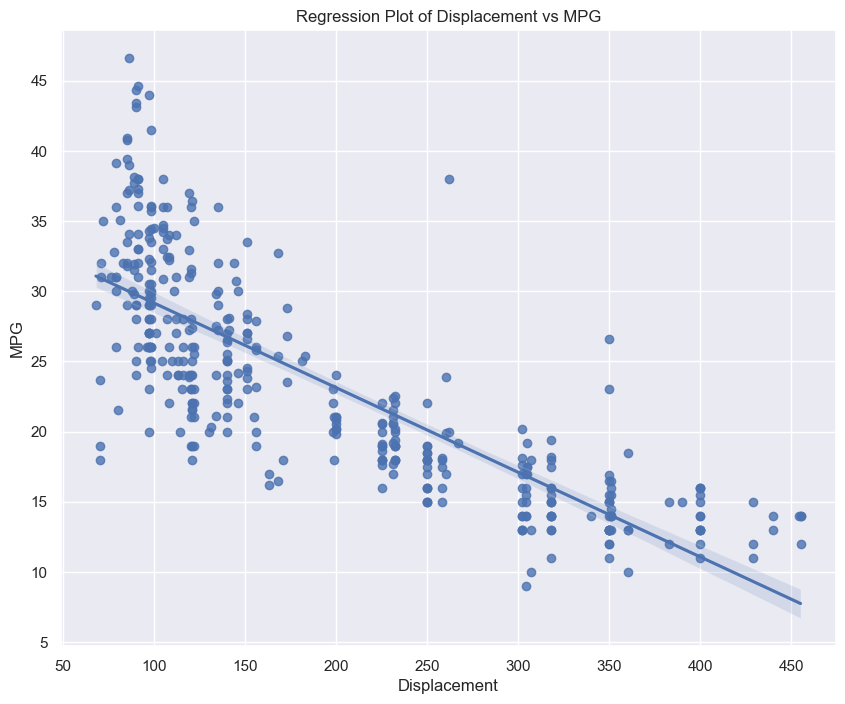

In [22]:
sns.regplot(x=numeric_data['displacement'], y=numeric_data['mpg'])
plt.title('Regression Plot of Displacement vs MPG')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

In [23]:
## Test Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (318, 7)
Testing set size: (80, 7)


In [66]:
# Scaler
scaler = StandardScaler()

In [26]:
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

In [27]:
# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [28]:
## Train the Model on the scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### Cross validation 

In [30]:
## Create a Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('model', LinearRegression())  # Step 2: Train the model
])

In [35]:
## Performe the cross-validation
validation_score = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

In [37]:
### Print the results
print(f"cross-Validation R-squared score: {validation_score}")

cross-Validation R-squared score: [0.57044381 0.68533649 0.82341732 0.68215678 0.21648306]


In [38]:
print(f"Mean R-squared: {validation_score.mean()}")

Mean R-squared: 0.5955674914858822


In [39]:
print(f"Standard Deviation of R-squared: {validation_score.std()}")

Standard Deviation of R-squared: 0.20581930261895767


### Prediction

In [42]:
y_predict = model.predict(X_test_scaled)

In [43]:
y_predict

array([32.88140046, 29.55780381, 21.36955005, 16.79734409, 12.4982001 ,
       27.20579297, 27.90034172,  9.77551057, 16.88434148, 22.03432001,
       12.80789558, 36.15459303, 25.17028795, 13.69410403, 23.9851906 ,
        6.38676545, 29.53717565, 23.57394424, 16.32934475, 36.28649078,
       23.71277029, 18.98644465, 28.71675729, 28.74222236, 14.9937939 ,
       34.66185682, 25.48371184, 24.95050273, 21.94949529,  8.78921085,
       28.43042198, 34.85784604, 20.52566418, 26.07137821, 34.25192799,
       11.98882056, 22.93388155, 21.74271783, 12.32731516, 26.75009008,
       26.24028149, 27.42358817, 20.15034925,  7.2688964 , 24.53759706,
       34.94012278, 26.75746176, 24.19444148, 22.51366966, 27.5625466 ,
       22.68143886, 33.67127815, 32.67124307, 10.95619387, 27.70684405,
       10.00691734, 19.76572214, 29.87443683, 23.17483434, 20.47189168,
       16.18259662, 32.09331845, 24.02025492, 20.49935146, 20.92671853,
       25.51057393, 25.11923146, 32.38245245, 28.07654777, 12.71

In [46]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [47]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")

Mean Squared Error: 8.197746885824966
Mean Absolute Error: 2.255363261283564
Root Mean Square Error: 2.8631707748272657


In [49]:
r_score = r2_score(y_test, y_predict)
r_score

0.8475304239212406

In [50]:
## Display adjusted R-squared
print(1 - (1-r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8327069929135834


### Assumption

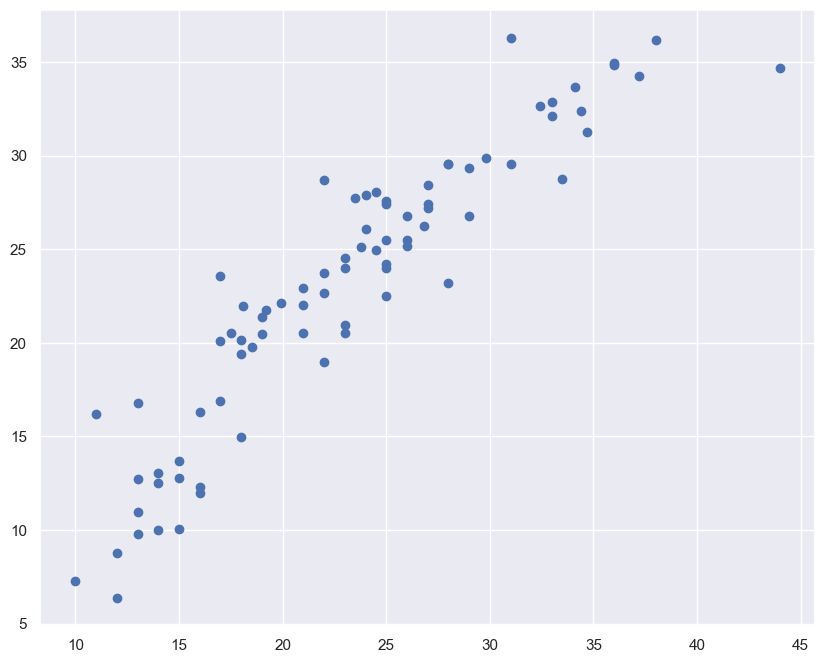

In [52]:
plt.scatter(y_test, y_predict)

### Find the Residuals

In [53]:
residuals = y_test - y_predict
print(f"Residuals: {residuals}")

Residuals: 198    0.118600
396   -1.557804
33    -2.369550
208   -3.797344
93     1.501800
         ...   
249   -2.227317
225   -3.019951
367   -1.529060
175   -0.333258
285   -3.087044
Name: mpg, Length: 80, dtype: float64


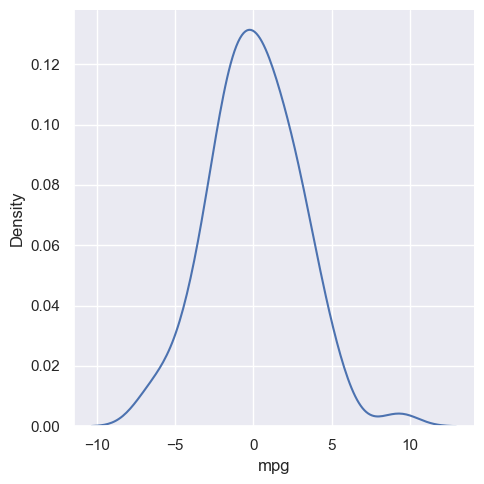

In [55]:
### Plot the Residuals
sns.displot(residuals, kind='kde')

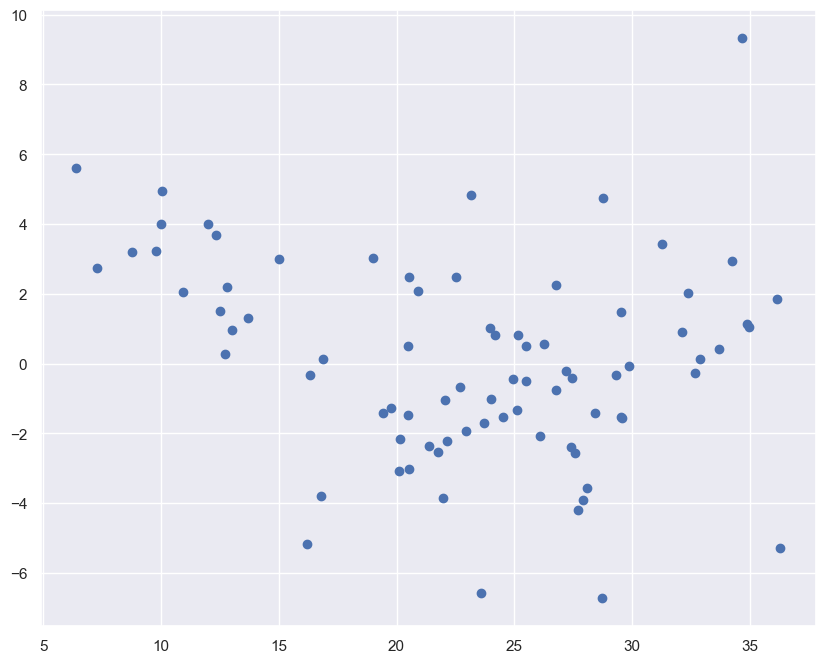

In [57]:
### Scatter plot with respect to prediction and residuals
plt.scatter(y_predict, residuals)

### OLS Linear Regression

In [63]:
import statsmodels.api as sm
sm_model = sm.OLS(y_train, X_train_scaled).fit()

In [64]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.062
Method:                 Least Squares   F-statistic:                              3.985
Date:                Wed, 27 Nov 2024   Prob (F-statistic):                    0.000344
Time:                        18:03:42   Log-Likelihood:                         -1459.9
No. Observations:                 318   AIC:                                      2934.
Df Residuals:                     311   BIC:                                      2960.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4622      6.306      0.232      0.817     -10.947      13.871
x2            -0.4883      4.072     -0.120      0.905      -8.500       7.523
x3            -5.6622      4.338     -1.305      0.193     -14.198       2.874
x4             0.1897      2.136      0.089      0.929      -4.013       4.393
x5            -0.2638      4.491     -0.059      0.953      -9.101       8.573
x6             2.8599      1.527      1.873      0.062      -0.144       5.864
x7             1.0722      1.821      0.589      0.556      -2.510       4.654
==============================================================================
Omnibus:                       23.962   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.103
Skew:                           0.523   Prob(JB):                     2.39e-08
Kurtosis:                       4.247   Cond. No.                         11.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""